# Pymaceuticals Inc.

---

# Conclusions

- There are more observations for the regimens Capomulin and Ramicane.
- The number of female mice and male mice for the study is almost the same, with 51% male mice and 49% female mice.
- The standard deviation of the average Tumor Volume is low for all the treatments, which means the results are not very spread. This can also be confirmed with only observing one outlier among the last observation for treatments with Capomulin, Ramicane, Infubino and Ceftamin.
- Among the 4 treatments analyzed, the best results were observed with Capomulin and Ramicane, where the average final tumor volumes where smaller.
- Mouse v923 had a big drop in the tumor volume in the first 10 days of treatment with Capomulin, going from 45mm3 to 39.84 mm3. It remained stable until day 20 and increased to 42.15 when observed on day 40 when finally dropped to 40.65 during the final observation on day 25.
- For the Capomulin treatment there is a strong positive correlation between the mouse weight and the average tumor volume.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Data paths
mouse_data_path = "data/Mouse_metadata.csv"
study_data_path = "data/Study_results.csv"

# Read csv files
mouse_data = pd.read_csv(mouse_data_path)
study_data = pd.read_csv(study_data_path)

In [2]:
# Merge data
complete_data = pd.merge(study_data, mouse_data,on="Mouse ID", how="left")
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Number of mice
complete_data["Mouse ID"].nunique()

249

In [4]:
# Identify duplicate mouse ID and timpepoint combinations
duplicate_mice = complete_data[complete_data.duplicated(subset=["Mouse ID","Timepoint"], keep= False)]
duplicate_mice = pd.unique(duplicate_mice["Mouse ID"])
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# All data for duplicate mice
duplicate_mice_data = complete_data[complete_data["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Clean data without duplicate mice
clean_complete_data = complete_data[complete_data["Mouse ID"] != "g989"]
clean_complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Confirm number of mice
clean_complete_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Summary Statistics method 1
# Calculate statistics: Mean, Median, Variance, Standard Deviation and SEM
mean_tumor_volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].median()
variance_tumor_volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].std()
sem_tumor_volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].sem()

# Summary of statistics
statistics_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume,
                    "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Std. Dev.": std_dev_tumor_volume,
                    "Tumor Volume Std. Err.": sem_tumor_volume})

#Display summary
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Summary Statistics method 2
# Define statistics
statisticts = {"Tumor Volume (mm3)":["mean","median","var","std","sem"]}

# Groups by drug regime and apply the statistics aggregation
statistics_summary2 = clean_complete_data.groupby("Drug Regimen").agg(statisticts)

# Display the summary statistics
statistics_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

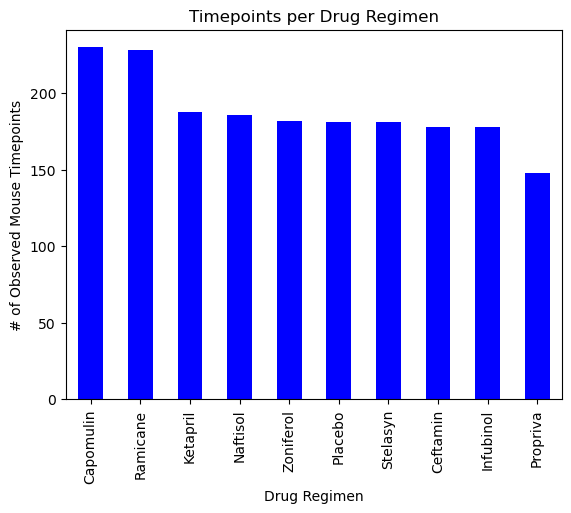

In [10]:
# Bar chart showing the total number of observations (timepoints for all mice) by each drug regimen (Pandas)
bar_df = clean_complete_data.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending= False)
bar_df.plot(kind= "bar", color= "b", ylabel= "# of Observed Mouse Timepoints", title= "Timepoints per Drug Regimen");

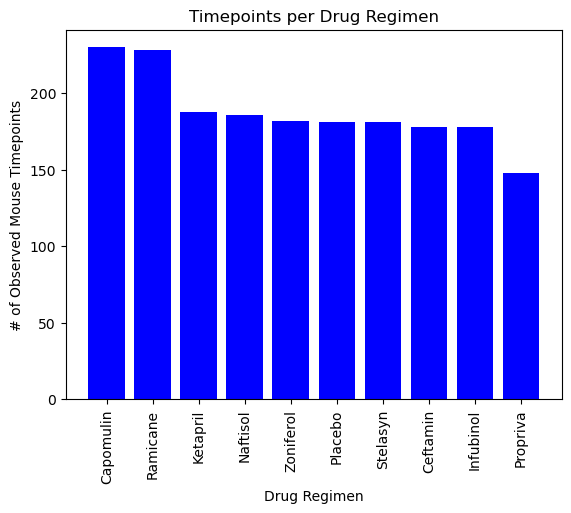

In [11]:
# Bar chart showing the total number of observations (timepoints for all mice) by each drug regimen (Matplotlib)
bar_df = clean_complete_data.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending= False)
bar_df = bar_df.reset_index()
plt.bar(bar_df["Drug Regimen"],bar_df["Mouse ID"], color="b", alpha=1)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.tight_layout
plt.show()

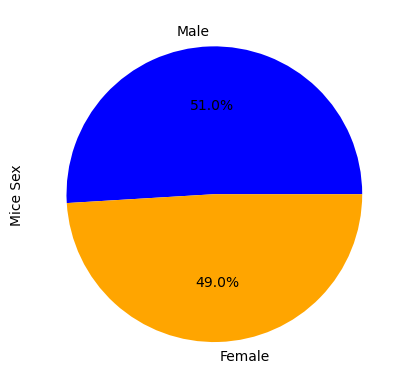

In [12]:
# Pie chart showing percentage of male and female mice (Pandas)
pie_df = clean_complete_data.groupby("Sex")["Mouse ID"].count().sort_values(ascending= False)
pie_df.plot(kind="pie", colors= ["b","orange"], labels= ["Male", "Female"], ylabel="Mice Sex", autopct= "%1.1f%%");

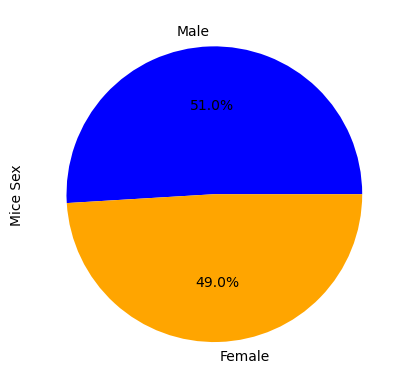

In [13]:
# Pie chart showing percentage of male and female mice (Matplotlib)
mice_sex = [(clean_complete_data["Sex"]=="Male").sum(),(clean_complete_data["Sex"]=="Female").sum()]
plt.pie(mice_sex, colors=["b","orange"], labels=["Male","Female"], autopct="%1.1f%%")
plt.ylabel("Mice Sex")
plt.tight_layout
plt.show()

# Quartiles, Outliers and Boxplots

In [14]:
# Last timepoint for each mouse
last_timepoint_df = clean_complete_data.groupby("Mouse ID")["Timepoint"].max()

# Reset Index
last_timepoint_df.reset_index()

# Display last timepoint for each mouse
last_timepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [15]:
# Create a dataframe for the last timepoint per mouse
last_merge_df = pd.merge(last_timepoint_df, clean_complete_data, on=["Mouse ID","Timepoint"], how="left")

# Display dataframe
last_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Outliers option 1
# List of treatments for boxplots
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty lists for the different treatment tumor volume data
tumor_vol_data = []

# For loop to obtain information for each treatment
for i,treatment in enumerate(treatments):
    
    # Obtain tumor volume data
    last_tumor_vol_data = last_merge_df.loc[last_merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add tumor volumen data to a list
    tumor_vol_data.append(last_tumor_vol_data)

    # Caltulate quartiles for each treatment tumor volume data
    quartiles = tumor_vol_data[i].quantile([0.25,0.75])
    
    # Calculate lower and upper quartiles, iqr and lower and upper bounds
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_b = lower_q - 1.5 * iqr
    upper_b = upper_q + 1.5 * iqr

    # Determine outliers and print them
    outliers = []
    for element in last_tumor_vol_data:
        if element < lower_b or element > upper_b:
            outliers.append(element)
    print(f"{treatment}'s IQR is: {round(iqr,2)}") 
    print(f"{treatment}'s potential outliers: {outliers}") 

Capomulin's IQR is: 7.78
Capomulin's potential outliers: []
Ramicane's IQR is: 9.1
Ramicane's potential outliers: []
Infubinol's IQR is: 11.48
Infubinol's potential outliers: [36.3213458]
Ceftamin's IQR is: 15.58
Ceftamin's potential outliers: []


In [17]:
# Outliers option 2
# List of treatments for boxplots
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty lists for the different treatment tumor volume data
tumor_vol_data = []

# For loop to obtain information for each treatment
for i,treatment in enumerate(treatments):
    
    # Obtain tumor volume data
    last_tumor_vol_data = last_merge_df.loc[last_merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add tumor volumen data to a list
    tumor_vol_data.append(last_tumor_vol_data)

    # Caltulate quartiles for each treatment tumor volume data
    quartiles = tumor_vol_data[i].quantile([0.25,0.75])
    
    # Calculate lower and upper quartiles, iqr and lower and upper bounds
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_b = lower_q - 1.5 * iqr
    upper_b = upper_q + 1.5 * iqr

    # Determine outliers and print them
    outliers = last_merge_df.loc[(last_merge_df["Drug Regimen"] == treatment) & 
                                ((last_merge_df["Tumor Volume (mm3)"] < lower_b) |
                                (last_merge_df["Tumor Volume (mm3)"] > upper_b)),"Tumor Volume (mm3)"]
    print(f"{treatment}'s IQR is: {round(iqr,2)}") 
    print(f"{treatment}'s potential outliers: {outliers}")   

Capomulin's IQR is: 7.78
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR is: 9.1
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR is: 11.48
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR is: 15.58
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


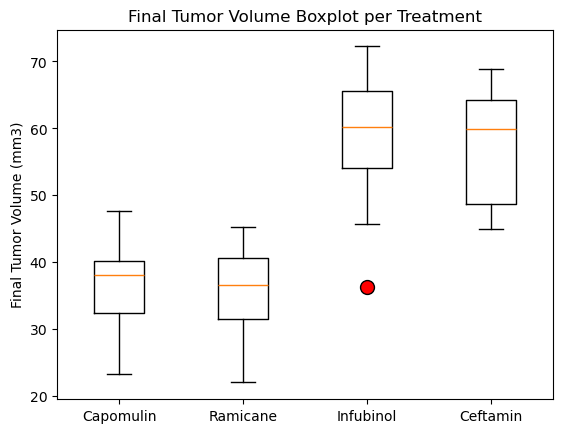

In [18]:
# Creating the subplots
fig, ax= plt.subplots()

# For loop to generate the boxplots for the tumor volume data of each treatment
for i, treatment in enumerate(treatments):
    position = i + 1 
    ax.boxplot(tumor_vol_data[i], positions=[position],widths= 0.4, flierprops=dict(markerfacecolor="red", markersize= "10"))
    ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(treatments)
ax.set_title("Final Tumor Volume Boxplot per Treatment")
plt.show()

# Line and Scatter Plots

In [19]:
# Identify mouse ids of mice treated with Capomulin
mice_capomulin = clean_complete_data.loc[clean_complete_data["Drug Regimen"]=="Capomulin"]
mouse_ids_capomulin = mice_capomulin["Mouse ID"].unique()
mouse_ids_capomulin

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

In [20]:
# Tumor volume data for selected mouse
mouse = "v923"
mouse_data = clean_complete_data.loc[clean_complete_data["Mouse ID"]==mouse]
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
236,v923,0,45.000000,0,Capomulin,Female,19,21
339,v923,5,45.704434,0,Capomulin,Female,19,21
520,v923,10,39.848223,0,Capomulin,Female,19,21
913,v923,15,40.457989,0,Capomulin,Female,19,21
1025,v923,20,39.648296,0,Capomulin,Female,19,21
1232,v923,25,40.156413,1,Capomulin,Female,19,21
1300,v923,30,40.752216,2,Capomulin,Female,19,21
1616,v923,35,41.439242,2,Capomulin,Female,19,21
1683,v923,40,42.151015,2,Capomulin,Female,19,21
1821,v923,45,40.658124,2,Capomulin,Female,19,21


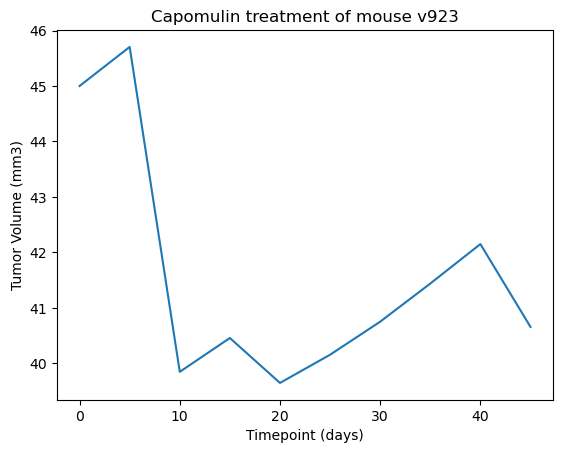

In [21]:
# Generate line plot for tumor volume vs. time point for a selected mouse treated with Capomulin
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse "+ mouse)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.show()

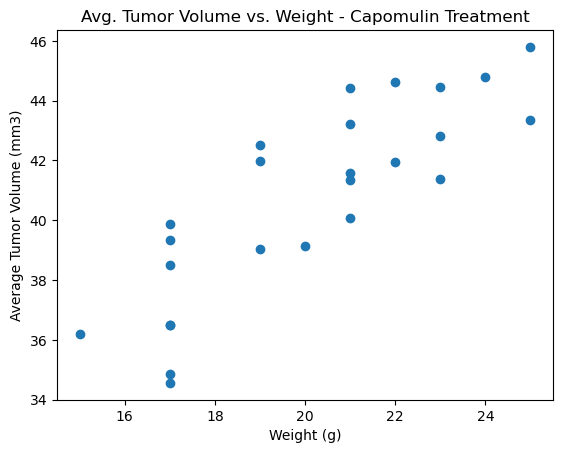

In [22]:
# Group by Mouse ID and weight and calculate average tumor volume for mice treated with Capomulin 
average_tumor_capomulin = mice_capomulin.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

# Generate a scatter plot to observe mouse weight vs. average tumor volume for the Capomulin regimen
plt.scatter(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])
plt.title("Avg. Tumor Volume vs. Weight - Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout
plt.show()

# Correlation and Regression

In [23]:
# Calculate correlation coefficient between the mouse weight and the average tumor volume for Capomulin regimen
corr_val = average_tumor_capomulin[["Weight (g)", "Tumor Volume (mm3)"]].corr().iloc[1,0]
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_val,2)}")

The correlation between mouse weight and the average tumor volume is 0.84


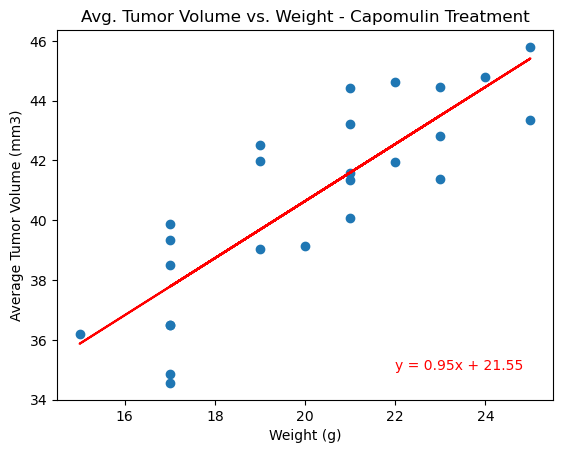

In [24]:
# Calculate elements of the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])

# Calculate regression values
regress_values = average_tumor_capomulin["Weight (g)"] * slope + intercept

# Generate a scatter plot and regression line to observe mouse weight vs. average tumor volume for the Capomulin regimen
plt.scatter(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])
plt.plot(average_tumor_capomulin["Weight (g)"],regress_values,"r-")
plt.title("Avg. Tumor Volume vs. Weight - Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
equation_label = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation_label,(22,35),fontsize=10,color="red")
plt.tight_layout
plt.show()